In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA 
import seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

1. READ THE DATA AND REDUCE IT TO 64 REQUIRED COLOUMNS

In [5]:
data = pd.read_excel(r'C:\Users\madhu\Desktop\Academics\Data Analytics\HW2\urldata.xlsx')
df = pd.DataFrame(data)
target = df['data1']
df = df.iloc[:,1:65]
df

,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,...,data56,data57,data58,data59,data60,data61,data62,data63,data64,data65
0,0.045643,0.068966,0.117647,0,0.285714,0.0,0.674371,0.772287,0.265889,0.005951,...,0,0,0,0,0,0,0.0,0.005952,0.0,0.0
1,0.203320,0.089655,0.176471,0,0.142857,0.0,0.608748,0.840232,0.457520,0.285713,...,0,0,0,0,0,0,0.0,0.001488,0.0,0.0
2,0.074689,0.124138,0.058824,0,0.285714,0.0,0.823479,0.807369,0.297082,0.011903,...,0,0,0,0,0,0,0.0,0.000000,0.0,0.0
3,0.066390,0.103448,0.117647,0,0.428571,0.0,0.684713,0.789068,0.652226,0.285672,...,0,0,0,0,0,0,0.0,0.001488,0.0,0.0
4,0.112033,0.082759,0.235294,0,0.000000,0.5,0.419381,0.820999,0.000000,0.023808,...,0,0,0,0,0,0,0.0,0.023810,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.116183,0.089655,0.117647,0,0.142857,0.0,0.608748,0.840232,0.457520,0.285654,...,0,0,0,0,0,0,0.0,0.001400,0.0,0.0
996,0.161826,0.089655,0.176471,0,0.142857,0.0,0.608748,0.840232,0.457520,0.285711,...,0,0,0,0,0,0,0.0,0.001399,0.0,0.0
997,0.058091,0.089655,0.117647,0,0.142857,0.0,0.705068,0.851070,0.379919,0.000494,...,0,0,0,0,0,0,0.0,0.000000,0.0,0.0
998,0.029046,0.048276,0.058824,0,0.142857,0.0,0.858922,0.829506,0.167817,0.142856,...,0,0,0,0,0,0,0.0,0.000000,0.0,0.0


Calculate PCA and Eigen Values to maintain 99% variance

In [29]:
from sklearn.decomposition import PCA 
pca1 = PCA(0.99)
pca1.fit(scaled_data)
x_pca1 = pca1.transform(scaled_data)
print(x_pca1.shape)
cov_mat = np.cov(x_pca1.T)
eig_vals1, eig_vecs = np.linalg.eig(cov_mat)
#print('\nEigenvalues \n%s' %eig_vals1)
sorted_eig1 = sorted(eig_vals1, reverse = True)
print("Reduced number of components:",pca1.n_components_)

(1000, 28)
Reduced number of components: 28


Calculate PCA and Eignen Values to maintain 95% variance

In [30]:
from sklearn.decomposition import PCA 
pca2 = PCA(0.95)
pca2.fit(scaled_data)
x_pca2 = pca2.transform(scaled_data)
print(x_pca2.shape)
cov_mat = np.cov(x_pca2.T)
eig_vals2, eig_vecs = np.linalg.eig(cov_mat)
#print('\nEigenvalues \n%s' %eig_vals2)
sorted_eig2 = sorted(eig_vals2, reverse = True)
print("Reduced number of components:",pca2.n_components_)

(1000, 22)
Reduced number of components: 22


In [38]:
print(sorted_eig1)

[8.694766298631155, 7.299196044319201, 5.185227196707494, 2.9419912790097267, 2.5083892470160003, 2.3847457303987594, 2.1707812399397395, 2.007458105012102, 1.7225631832857655, 1.350494739122459, 1.3121085347613524, 1.070637144082624, 0.941887369513547, 0.9269046004790329, 0.7355158937448527, 0.6731450889885695, 0.6571445700353534, 0.5947233239210655, 0.5815330415377761, 0.4761154026401351, 0.44065966249843813, 0.4036092147389082, 0.35685642867747536, 0.3473795258890299, 0.2624678032110548, 0.22449463436838074, 0.2071695818439004, 0.18640452527501933]


SCREEPLOT TO MAINTAIN 99% VARIANCE

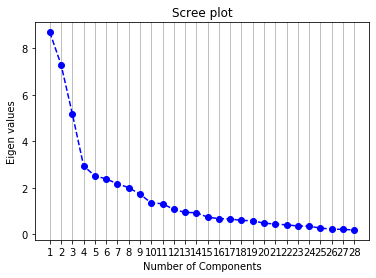

In [37]:
fig, ax = plt.subplots()
x = np.arange(start=1, stop=29, step=1)
y = sorted_eig1
plt.plot(x, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 29, step=1)) 
plt.ylabel('Eigen values')
plt.title('Scree plot')
ax.grid(axis='x')
plt.show()

SCREE PLOT TO MAINTAIN 95% VARIANCE

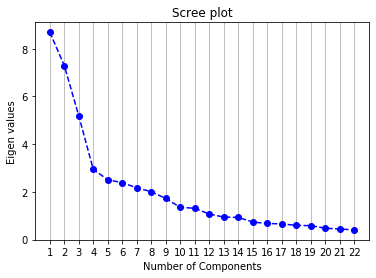

In [32]:
fig, ax = plt.subplots()
x = np.arange(start=1, stop=23, step=1)
y = sorted_eig2
plt.plot(x, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 23, step=1)) 
plt.ylabel('Eigen values')
plt.title('Scree plot')
ax.grid(axis='x')
plt.show()

Variance Vs Number of Components

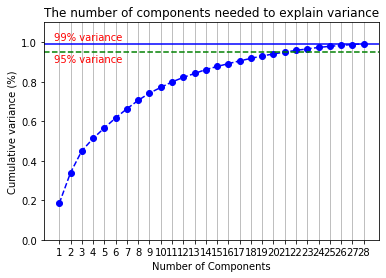

In [42]:
fig, ax = plt.subplots()
x = np.arange(start=1, stop=29, step=1)
y = np.cumsum(pca1.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 29, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='b', linestyle='-')
plt.text(0.5, 1.01, '99% variance', color = 'red', fontsize=10)
plt.axhline(y=0.95, color='g', linestyle='--')
plt.text(0.5, 0.90, '95% variance', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

Comments: From the observed scree plots, It is evident that Number of components are reduced withe explained varaince.Eigen values and Eigen Vectors are calculated from the covariance matrix of the projected data.